In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pmdarima import auto_arima

#os.chdir('C:\official')

In [3]:
data_final = pd.read_excel('C:/Users/ABL2BAN/Downloads/LCV File.xlsx',engine='openpyxl')
#data = data.iloc[6:-1,:]
data_final.shape

(14, 235)

In [4]:
data_final.describe()

,Model+Engine,100590149012,100590150464,101716102108,101716132165,101716137944,101720102113,101720102114,101720102143,101720102144,...,5092134824,5092144374,5092149127,5590131710,5590140980,5590150575,5889102075,5889102081,5889146858,5889149958
count,14.0000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2022.5000,1190.333333,646.555556,6700.000000,4399.888889,1653.333333,2117.333333,3656.000000,5334.555556,6579.111111,...,20209.222222,33096.888889,2937.111111,557.111111,2944.444444,1205.222222,2843.555556,918.777778,5296.222222,4488.888889
std,4.1833,539.590354,507.957457,547.722558,2120.351707,2253.068630,1336.707148,2697.499861,4022.316003,5799.491711,...,31753.493500,23393.937032,3234.249003,306.899595,2185.812841,859.276117,1722.961340,1674.844305,3258.049178,3148.191721
min,2016.0000,102.000000,111.000000,5900.000000,1755.000000,165.000000,200.000000,193.000000,200.000000,183.000000,...,555.000000,11263.000000,194.000000,130.000000,500.000000,254.000000,32.000000,39.000000,1054.000000,400.000000
25%,2019.2500,969.000000,167.000000,6300.000000,3181.000000,326.000000,1179.000000,2100.000000,2450.000000,2459.000000,...,1265.000000,15463.000000,1089.000000,446.000000,1500.000000,836.000000,1710.000000,143.000000,3374.000000,2000.000000
50%,2022.5000,1358.000000,500.000000,6700.000000,4000.000000,488.000000,2138.000000,3859.000000,4262.000000,4265.000000,...,1701.000000,20000.000000,1176.000000,502.000000,2500.000000,1000.000000,3000.000000,200.000000,5694.000000,4400.000000
75%,2025.7500,1586.000000,925.000000,7100.000000,4607.000000,1714.000000,2918.000000,4441.000000,6965.000000,9858.000000,...,29263.000000,55350.000000,3272.000000,762.000000,4500.000000,1492.000000,4000.000000,247.000000,8014.000000,6800.000000
max,2029.0000,1836.000000,1488.000000,7500.000000,8000.000000,6500.000000,4657.000000,8576.000000,12495.000000,16414.000000,...,86679.000000,70638.000000,9091.000000,1000.000000,6500.000000,3000.000000,5194.000000,5000.000000,10546.000000,9200.000000


In [5]:
data_final.columns.tolist()

['Model+Engine',
 100590149012,
 100590150464,
 101716102108,
 101716132165,
 101716137944,
 101720102113,
 101720102114,
 101720102143,
 101720102144,
 101720149928,
 101720152127,
 101720152678,
 101733102158,
 101733132996,
 101733152535,
 101733153642,
 101915102453,
 101915132989,
 101915138027,
 104578104860,
 104579105047,
 104663136549,
 104663139781,
 104663144368,
 104663144380,
 104663152190,
 105164105140,
 130521149497,
 131203131710,
 131204136666,
 131204136667,
 131204149118,
 131204149120,
 131204152660,
 131204153804,
 131660136668,
 131660149121,
 131693132165,
 131693148217,
 131693148218,
 131693150242,
 131693156138,
 131693156146,
 1316937638,
 1316937640,
 132343132052,
 132343149025,
 133001154756,
 133001156102,
 133001156103,
 133001156115,
 133001156150,
 133160105215,
 133160132108,
 133160133567,
 133160137366,
 133160144383,
 133160149027,
 133160149942,
 133160150977,
 133160152128,
 133160152680,
 133160156094,
 133160156097,
 133160156098,
 13316015613

In [14]:
columns_to_forecast = [100590149012,
 100590150464,
 101716102108,
 101716132165,
 101716137944,
 101720102113,
 101720102114,
 101720102143,
 101720102144,
 101720149928,
 101720152127,
 101720152678,
 101733102158,
 101733132996,
 101733152535,
 101733153642,
 101915102453,
 101915132989,
 101915138027,
 104578104860,
 104579105047,
 104663136549,
 104663139781,
 104663144368,
 104663144380,
 104663152190,
 105164105140,
 130521149497,
 131203131710,
 131204136666,
 131204136667,
 131204149118,
 131204149120,
 131204152660,
 131204153804,
 131660136668,
 131660149121,
 131693132165,
 131693148217,
 131693148218,
 131693150242,
 131693156138,
 131693156146,
 1316937638,
 1316937640,
 132343132052,
 132343149025,
 133001154756,
 133001156102,
 133001156103,
 133001156115,
 133001156150,
 133160105215,
 133160132108,
 133160133567,
 133160137366,
 133160144383,
 133160149027,
 133160149942,
 133160150977,
 133160152128,
 133160152680,
 133160156094,
 133160156097,
 133160156098,
 133160156139,
 133160156141,
 133160156145,
 133160156147,
 133166135401,
 133166138119,
 133166144364,
 133166149027,
 133166150977,
 133166156094,
 133166156147,
 133167144389,
 133167144395,
 133167149028,
 133167152680,
 133167156143,
 133167156149,
 133244134181,
 133244144392,
 133244149073,
 133244154756,
 133244156099,
 133244156115,
 133284133000,
 133284144374,
 133284149127,
 134590133059,
 134590138119,
 134590149027,
 134590149076,
 134590150977,
 134590156094,
 134590156147,
 135420135386,
 135420144612,
 137275139510,
 137446151365,
 137678137776,
 137678137930,
 137863137862,
 137863139247,
 138001137366,
 138001152680,
 138001156139,
 138001156149,
 138075136660,
 138075152166,
 138075153221,
 138075156137,
 138075156140,
 140462134825,
 140875134798,
 140875139150,
 140875139155,
 140875139786,
 143153143372,
 144498144263,
 144498144264,
 144555149852,
 144657144608,
 144657144610,
 144657145360,
 144657145362,
 144657152662,
 144783138855,
 145637100951,
 145637143372,
 147349132999,
 147349144372,
 147349152151,
 147349152546,
 149651149124,
 149651150007,
 150443144364,
 150445152130,
 150445152680,
 150445154251,
 150445156098,
 150445156136,
 150445156148,
 152385149942,
 152385150977,
 152385156145,
 152385156147,
 152386149942,
 152426150759,
 152426152620,
 152427150759,
 152427152196,
 152943134824,
 154132152662,
 154132156519,
 154705152190,
 156951149028,
 156951156143,
 157123155024,
 157123155025,
 157766155492,
 157829155491,
 157831155483,
 158416156524,
 158427156158,
 158428156159,
 158504156143,
 158505156217,
 158578156267,
 170078160077,
 170078161077,
 170080160077,
 170080160078,
 170082160079,
 170082160297,
 170084160080,
 170086160081,
 170086161081,
 170087160082,
 170087160083,
 170089160089,
 170089160090,
 170090160087,
 170090160094,
 170090160096,
 170091160085,
 170091160086,
 170091160094,
 170093160088,
 170093160097,
 170094160091,
 170094160092,
 170094160093,
 170094160094,
 170096160089,
 170096160090,
 170097160088,
 170097160095,
 170103160100,
 170104160100,
 170105160107,
 170105160111,
 170106160102,
 170106160113,
 170107160103,
 170107160104,
 170107160105,
 170107160112,
 170109160101,
 170109160106,
 170109160108,
 170110160106,
 170110160301,
 170111160109,
 170111160110,
 170112160110,
 170113160110,
 170335160297,
 170336160298,
 170338160300,
 170338161300,
 5092133000,
 5092134824,
 5092144374,
 5092149127,
 5590131710,
 5590140980,
 5590150575,
 5889102075,
 5889102081,
 5889146858,
 5889149958]

## Setting the index to year_month - this will help in mapping the predictions to the correct year-month
data_final.set_index('Date',inplace=True)

In [15]:
data_final

,Model+Engine,100590149012,100590150464,101716102108,101716132165,101716137944,101720102113,101720102114,101720102143,101720102144,...,5092134824,5092144374,5092149127,5590131710,5590140980,5590150575,5889102075,5889102081,5889146858,5889149958
0,2016,1836.0,125.0,5900.0,4000.0,6500.0,200.0,300.0,200.0,200.0,...,1919.0,20000.0,3272.0,975.0,1500.0,3000.0,1500.0,5000.0,8014.0,400.0
1,2017,969.0,465.0,6100.0,7600.0,4350.0,1500.0,2100.0,2450.0,2459.0,...,1701.0,63500.0,2180.0,1000.0,500.0,2000.0,3000.0,2200.0,5694.0,800.0
2,2018,102.0,500.0,6300.0,8000.0,355.0,2533.0,3039.0,3850.0,3650.0,...,1483.0,55350.0,1089.0,500.0,500.0,1000.0,4000.0,200.0,3374.0,2000.0
3,2019,765.0,738.0,6500.0,4094.0,326.0,2977.0,3859.0,4262.0,4265.0,...,1265.0,13354.0,194.0,513.0,1500.0,1027.0,4930.0,206.0,1054.0,3200.0
4,2020,1632.0,925.0,6700.0,1755.0,244.0,954.0,193.0,1315.0,183.0,...,1047.0,28642.0,1093.0,502.0,2500.0,836.0,1774.0,169.0,1266.0,4400.0
5,2021,993.0,111.0,6900.0,2468.0,165.0,2138.0,4441.0,6744.0,9047.0,...,555.0,70638.0,1176.0,186.0,3500.0,254.0,32.0,65.0,3586.0,5600.0
6,2022,1358.0,1300.0,7100.0,3181.0,738.0,4657.0,8576.0,12495.0,16414.0,...,29263.0,11263.0,9091.0,130.0,4500.0,328.0,1710.0,39.0,5906.0,6800.0
7,2023,1472.0,1488.0,7300.0,3894.0,488.0,2918.0,6324.0,9730.0,13136.0,...,57971.0,15463.0,659.0,446.0,5500.0,910.0,3452.0,143.0,8226.0,8000.0
8,2024,1586.0,167.0,7500.0,4607.0,1714.0,1179.0,4072.0,6965.0,9858.0,...,86679.0,19662.0,7680.0,762.0,6500.0,1492.0,5194.0,247.0,10546.0,9200.0
9,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data= data_final.filter(columns_to_forecast).copy()
data.shape

(14, 234)

5 100590149012
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=117.162, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=118.636, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=118.992, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.140 seconds
confidence interval [[-162370.74086869 1779766.78926611]]


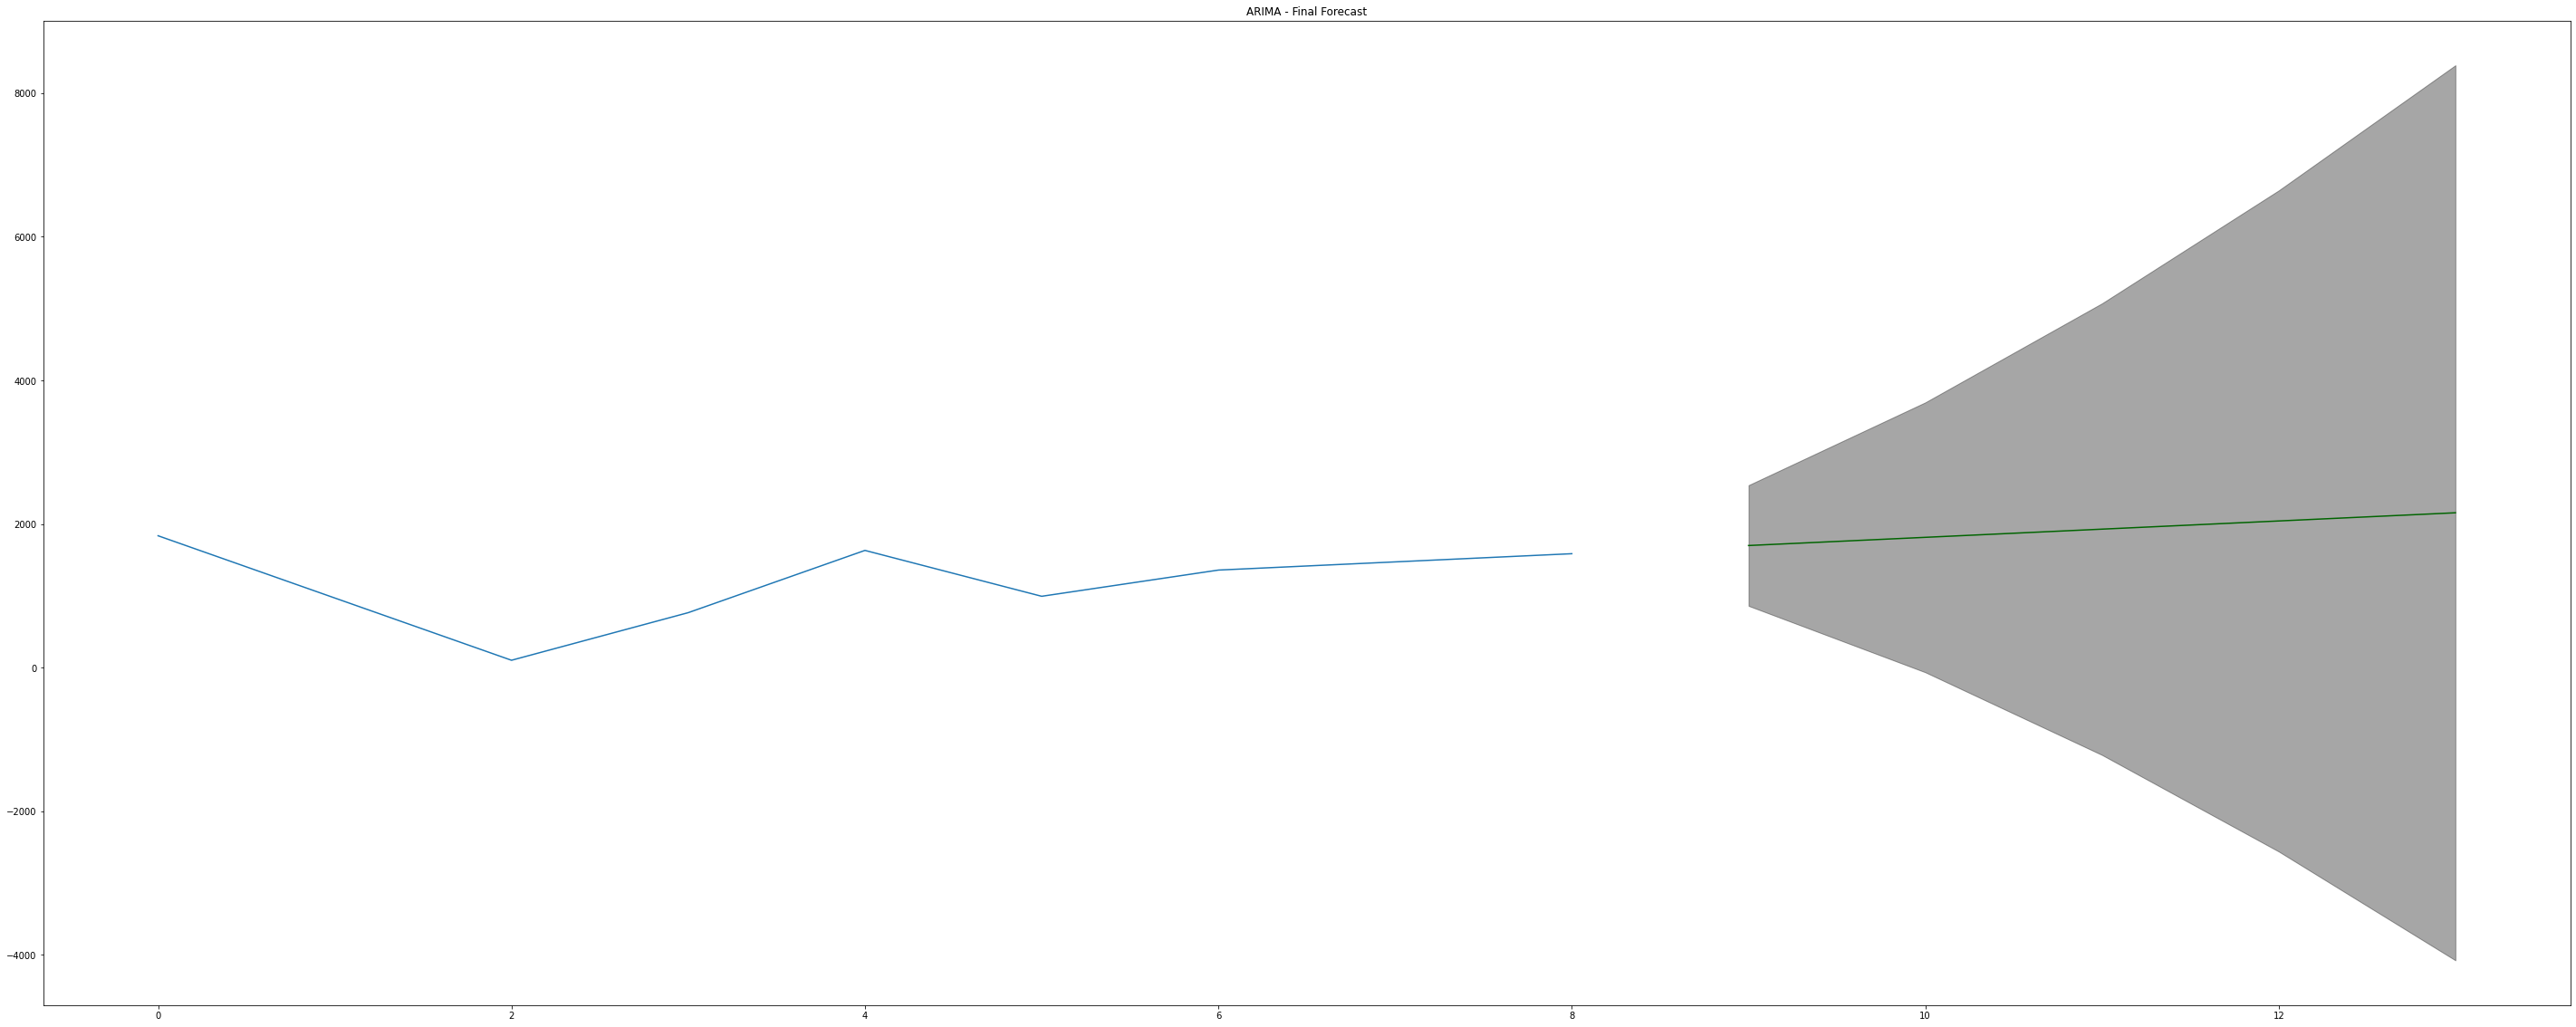

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [17]:
for c in columns_to_forecast:
    #periods of forecast - where we have nan in the series
    h = data[c].isna().sum()
    print(h,c)
#     using the past values for training
    train = data[~data[c].isna()]
    test = data[data[c].isna()]
    train_c = train[c]
    model = auto_arima(train_c, start_p=1, start_q=1,
                         test='kpss',
                         max_p=3, max_q=3, m=1,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True,
                         stepwise=True,alpha=0.35)
    model.fit(train_c)
    forecast = model.predict(n_periods=int(h))  
    fitted, confint = model.predict(n_periods=int(h), return_conf_int=True,alpha=0.35)
    print('confidence interval',model.conf_int())
    # make series for plotting purpose
    fitted_series = pd.Series(fitted,index=test.index)
    lower_series = pd.Series(confint[:, 0],index=test.index)
    upper_series = pd.Series(confint[:, 1],index=test.index)
    # Plot
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = 50
    fig_size[1] = 20
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(train_c)
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.35)

    plt.title("ARIMA - Final Forecast")
    plt.show()
    # Storing all high, medium and low forecasted values
    data[c+'_fitted'] = train[c].append(fitted_series)
    data[c+'_lower'] = train[c].append(lower_series)
    data[c+'_upper'] = train[c].append(upper_series)

In [ ]:
## Resetting the index after the forecast and mapping
#data.reset_index(inplace=True)

data.to_csv("C:/New_Model/PC_arima_2904.csv",index=False)